In [1]:
import scipy as sp
import numpy as np
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
from matplotlib import cm
#from matplotlib import rcParams
import ot

# enable latex rendering
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
#rcParams['text.usetex'] = True

# color settings
X_COLOR = '#3D9140' # '#6c712d' #(191/255,255/255,191/255) #'#bfffbf0'
Y_COLOR = '#ff0000' #  #(255/255,199/255,199/255) #'#ffc7c7'
T_COLOR = '#005e7d'
B_COLOR = T_COLOR

PLOT_TEXT = True



# PLOTTING OF OT GRAPH #########################################################
def plot_optimal_transport_graph(xs, ys, T=None, T_title=None, bs = None, path = None):
    fig = plt.figure(figsize=(16,6))
    ax = fig.add_subplot(1,2,1)
    ax.scatter(xs[:, 0], xs[:, 1], s=600, facecolors='white', edgecolors=X_COLOR)
    ax.scatter(ys[:, 0], ys[:, 1], s=600, facecolors='white', edgecolors=Y_COLOR)
    if bs is not None:
        ax.scatter(bs[:,0], bs[:,1],  s=600, facecolors='white', edgecolors=B_COLOR)
    offset_x = -0.125
    offset_y = -0.075
    for i in range(xs.shape[0]):
        if PLOT_TEXT:
            ax.text(xs[i,0]+offset_x, xs[i,1]+offset_y, '$\mathbf{x}_'+str(i+1)+'$',
                  fontsize=10, color=X_COLOR)
    for i in range(ys.shape[0]):
        if PLOT_TEXT:
            ax.text(ys[i,0]+offset_x, ys[i,1]+offset_y, '$\mathbf{y}_'+str(i+1)+'$',
                  fontsize=10, color=Y_COLOR)
    if bs is not None:
        for i in range(bs.shape[0]):
            if PLOT_TEXT:
                ax.text(bs[i,0]+offset_x, bs[i,1]+offset_y, '$\mathbf{b}_'+str(i+1)+'$',
                      fontsize=10, color=B_COLOR)
        
    plt.axis('off')
    X = np.concatenate((xs,ys), axis=0)
    plt.xlim([X[:,0].min()-1.0,X[:,0].max()+1.0])
    plt.ylim([X[:,1].min()-1.0,X[:,1].max()+1.0])
    plt.gca().set_aspect('equal')
    if T is not None:
        for i in range(xs.shape[0]):
            for j in range(ys.shape[0]):
                ax.plot([xs[i,0], ys[j,0]], [xs[i,1], ys[j,1]],
                         linewidth=T[i,j]*20, zorder=-1, color=T_COLOR, linestyle='--')
    if PLOT_TEXT:
        ax.text(4.0,2.5, T_title, color=T_COLOR, fontsize=10)
    if path is not None:
        plt.savefig(path)
    else:
        plt.show()
    
def plot_points(xs, T_title=None, path = None):
    fig = plt.figure(figsize=(16,6))
    ax = fig.add_subplot(1,2,1)
    ax.scatter(xs[:, 0], xs[:, 1], s=600, facecolors='white', edgecolors=X_COLOR)
    offset_x = -0.125
    offset_y = -0.075
    for i in range(xs.shape[0]):
        if PLOT_TEXT:
            ax.text(xs[i,0]+offset_x, xs[i,1]+offset_y, '$\mathbf{x}_'+str(i+1)+'$',
                  fontsize=10, color=X_COLOR)
            
    plt.axis('off')
    X = xs
    plt.xlim([X[:,0].min()-1.0,X[:,0].max()+1.0])
    plt.ylim([X[:,1].min()-1.0,X[:,1].max()+1.0])
    plt.gca().set_aspect('equal')
    
    if PLOT_TEXT:
        ax.text(4.0,2.5, T_title, color=T_COLOR, fontsize=10)
    if path is not None:
        plt.savefig(path)
    else:
        plt.show()

In [2]:
# CREATE POINTS ################################################################
xs = np.array(
  [[3.0, 5.0],
   [5, 0.2],
   [5.5, 4.0],
   [6.5, 3.0],
   [8.5, 1.5],
   [8.125, 6.0]]
)
ys = np.array(
  [[1.0, 1.0],
   [3.25, -0.1],
   [2.5, 3.0],
#    [3.0, 2.0],
   [4.5, 1.5],
   [6.5, 0.0]]
)

n_xs = xs.shape[0]
n_ys = ys.shape[0]
d = xs.shape[1]

In [3]:
xs, ys

(array([[3.   , 5.   ],
        [5.   , 0.2  ],
        [5.5  , 4.   ],
        [6.5  , 3.   ],
        [8.5  , 1.5  ],
        [8.125, 6.   ]]),
 array([[ 1.  ,  1.  ],
        [ 3.25, -0.1 ],
        [ 2.5 ,  3.  ],
        [ 4.5 ,  1.5 ],
        [ 6.5 ,  0.  ]]))

In [4]:
# OT DISTANCE COMPUTATIONS #####################################################
p = ot.unif(n_xs)
q = ot.unif(n_ys)

C = sp.spatial.distance.cdist(xs, ys, metric='euclidean')
T_W, log_W = ot.emd(p, q, C, log=True)

print('Wasserstein Distance: ' + str(log_W['cost']) )


# A = sp.spatial.distance.cdist(xs, xs, metric='euclidean')
# B = sp.spatial.distance.cdist(ys, ys, metric='euclidean')

# A /= A.max()
# B /= B.max()
# T_GW, log_GW = ot.gromov.gromov_wasserstein(A, B, p, q, 'square_loss',
#                                             log=True, verbose=True)
# print('Gromov-Wasserstein distance: ' + str(log_GW['gw_dist']))

Wasserstein Distance: 3.535694920218221


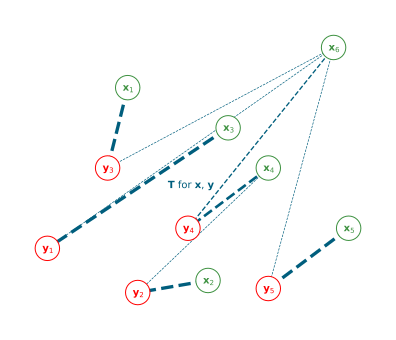

In [5]:
# show the optimal transport map
plot_optimal_transport_graph(xs, ys, T=T_W, T_title='$\mathbf{T}$ for $\mathbf{x}$, $\mathbf{y}$')

In [6]:
# create origin
N = 8
np.random.seed(69)
zs = np.random.randn(N,d)
zs = zs + (xs.sum(axis = 0) + ys.sum(axis = 0)) / (n_xs + n_ys) # normalize a little

In [7]:
def project(x, z):
    # returns phi(x), pi_x, log_w
    N = z.shape[0]
    p = ot.unif(x.shape[0])
    q = ot.unif(N)

    C = sp.spatial.distance.cdist(z, x, metric='euclidean')
    T_W, log_W = ot.emd(q, p, C, log=True)
    
    return (N*(T_W @ x) - z)/np.sqrt(N), T_W, log_W

In [8]:
phi_x, pi_x, log_x = project(xs, zs)
phi_y, pi_y, log_y = project(ys, zs)

In [9]:
(N*(pi_x @ xs) - zs)/np.sqrt(N)

array([[ 0.46243997,  0.29052323],
       [ 0.84659173, -0.06378741],
       [-0.12222205,  0.82040498],
       [ 0.6986048 ,  0.94111766],
       [ 0.44050664,  0.36373234],
       [ 0.09954481, -0.5514146 ],
       [ 0.49387513,  0.19006984],
       [ 0.31312775,  0.32146673]])

In [10]:
pi_x_inv = np.linalg.pinv(pi_x)
1/(N ) * np.matmul(pi_x_inv, np.sqrt(N) * phi_x + zs)

array([[3.   , 5.   ],
       [5.   , 0.2  ],
       [5.5  , 4.   ],
       [6.5  , 3.   ],
       [8.5  , 1.5  ],
       [8.125, 6.   ]])

In [11]:
pi_y_inv = np.linalg.pinv(pi_y)
1/(N ) * np.matmul(pi_y_inv, np.sqrt(N) * phi_y + zs)

array([[ 1.0000000e+00,  1.0000000e+00],
       [ 3.2500000e+00, -1.0000000e-01],
       [ 2.5000000e+00,  3.0000000e+00],
       [ 4.5000000e+00,  1.5000000e+00],
       [ 6.5000000e+00, -1.2490009e-16]])

In [12]:
pi_x_inv

array([[ 0.00000000e+00,  0.00000000e+00,  7.33333333e+00,
         0.00000000e+00, -1.48029737e-16, -6.66666667e-01,
        -6.66666667e-01,  2.00000000e+00],
       [ 4.52323861e-17, -4.81085533e-16, -6.66666667e-01,
        -8.75823195e-16,  2.22126434e-16,  7.33333333e+00,
        -6.66666667e-01,  2.00000000e+00],
       [-4.52323861e-17,  4.81085533e-16, -6.66666667e-01,
         8.75823195e-16,  1.25817093e-15, -6.66666667e-01,
         7.33333333e+00,  2.00000000e+00],
       [ 6.00000000e+00, -2.00000000e+00,  2.79017589e-16,
        -2.00000000e+00,  6.00000000e+00, -4.91663711e-16,
        -9.17006985e-16, -6.84150254e-16],
       [ 1.20000000e+00,  7.60000000e+00,  4.30240742e-16,
         4.00000000e-01, -1.20000000e+00, -9.77365115e-16,
        -6.89047867e-16, -9.41038804e-16],
       [-1.20000000e+00,  4.00000000e-01, -8.94072555e-18,
         7.60000000e+00,  1.20000000e+00,  2.79985941e-17,
        -6.51216816e-17, -2.50795487e-16]])

In [20]:
(phi_x + zs / np.sqrt(N))

array([[2.5337993 , 0.88388348],
       [3.00520382, 0.53033009],
       [1.06066017, 1.76776695],
       [2.8726213 , 2.12132034],
       [2.48960513, 1.41421356],
       [1.76776695, 0.07071068],
       [1.94454365, 1.41421356],
       [1.59099026, 1.0842304 ]])

In [17]:
xs

array([[3.   , 5.   ],
       [5.   , 0.2  ],
       [5.5  , 4.   ],
       [6.5  , 3.   ],
       [8.5  , 1.5  ],
       [8.125, 6.   ]])

In [165]:
phi_y

array([[-0.2328817 , -0.60750238],
       [ 0.13948495, -0.5941175 ],
       [-0.6171968 , -0.31096587],
       [-1.07800099, -0.99635492],
       [-0.63488492, -0.74642531],
       [-0.07723188, -0.09179519],
       [-0.56678504, -0.16348355],
       [-0.92430912, -0.40921027]])

In [173]:
log_W

{'cost': 3.535694920218221,
 'u': array([ 0.88746706, -0.79340046,  1.90489598,  1.92245208,  1.48475587,
         5.20091424]),
 'v': array([3.50343093, 2.56892855, 1.17408576, 0.57754792, 1.01524413]),
 'warning': None,
 'result_code': 1}

In [177]:
np.linalg.norm(phi_y)

2.402615008490472

In [178]:
log_y

{'cost': 2.2661489307395146,
 'u': array([ 1.40932983,  1.33880587, -0.01087721,  2.74942653,  2.2413074 ,
         0.62016435,  0.75321349, -0.03677455]),
 'v': array([ 2.89586586,  1.74780877,  0.91525204, -0.28085775,  0.3873034 ]),
 'warning': None,
 'result_code': 1}